In [698]:
##import from the different librabry 
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# "normal" libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

#just thr train/val split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_score, recall_score, f1_score, accuracy_score

In [699]:
# Load the dataset
data = pd.read_excel('cleaned data.xlsx')

# Save as dataframe
data = pd.DataFrame(data)

In [700]:
# create X (features) and y (response)
X_data = data.drop(['Pno', 'Take-up ind'], axis = 1)
y_data = data['Take-up ind']

In [701]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_data = pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns)

In [702]:
# all my variables as seen as floats rather than strings or integers
X_data = X_data.astype(np.float32).values
y_data = y_data.astype(np.float32).values

In [707]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=7, stratify=y_data)

In [709]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(875, 25)
(219, 25)
(875,)
(219,)


In [644]:
def unique_value_counts(array):
    array = np.array(array)  # Convert to numpy array if not already
    unique, counts = np.unique(array, return_counts=True)
    return dict(zip(unique, counts))

In [666]:
def calculate_metrics(y_true, y_pred, y_prob=None, metrics=['precision', 'recall', 'f1', 'accuracy', 'auc']):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]
    
    results = {}
    
    # Calculate precision
    if 'precision' in metrics:
        results['precision'] = round( TP / (TP + FP), 4) if (TP + FP) > 0 else 0
    
    # Calculate recall
    if 'recall' in metrics:
        results['recall'] = round( TP / (TP + FN), 4) if (TP + FN) > 0 else 0
    
    # Calculate F1 score
    if 'f1' in metrics:
        results['f1'] = round( 2 * (TP / (2 * TP + FP + FN)), 4) if (2 * TP + FP + FN) > 0 else 0
    
    # Calculate accuracy
    if 'accuracy' in metrics:
        results['accuracy'] = round( (TP + TN) / (TP + TN + FP + FN), 4)
    
    # Calculate AUC
    if 'auc' in metrics and y_prob is not None:
        # Note: AUC requires probabilities, not class labels.
        results['auc'] = round( roc_auc_score(y_true, y_prob), 4)
    
    return results


In [646]:
array_random = np.random.choice([1, 0], size=219, p=[0.0951, 0.9049])
array_random

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

# Version 1

In [647]:
# np.random.seed(42)
# tf.random.set_seed(42)

# Build
model = keras.Sequential([
    keras.layers.Input(shape=(25,)),                # Number of input features
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')     # Single output unit for binary classification
])


# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(), 'accuracy', 'Precision', 'Recall'])


# Fit and train
history = model.fit(X_train, y_train, epochs=100, batch_size=30, verbose=0, validation_split=0.2)


In [648]:
# hist = pd.DataFrame(history.history)
# hist['f1_score'] = 2 * (hist['Precision'] * hist['Recall']) / (hist['Precision'] + hist['Recall'])
# hist['val_f1_score'] = 2 * (hist['val_Precision'] * hist['val_Recall']) / (hist['val_Precision'] + hist['val_Recall'])
# hist['epoch'] = history.epoch
# hist

In [667]:
# Predict
y_probs = model.predict(X_train)
y_train_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_train_pred))

# Metrics
metrics = calculate_metrics(y_true=y_train, y_pred=y_train_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
{0: 577, 1: 298}
{'precision': 0.1309, 'recall': 0.4588, 'f1': 0.2037, 'accuracy': 0.6514, 'auc': 0.585}


In [668]:
# Predict
y_probs = model.predict(X_test)
y_test_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_test_pred))

# Metrics
metrics = calculate_metrics(y_true=y_test, y_pred=y_test_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
{0: 143, 1: 76}
{'precision': 0.1053, 'recall': 0.4211, 'f1': 0.1684, 'accuracy': 0.6393, 'auc': 0.6246}


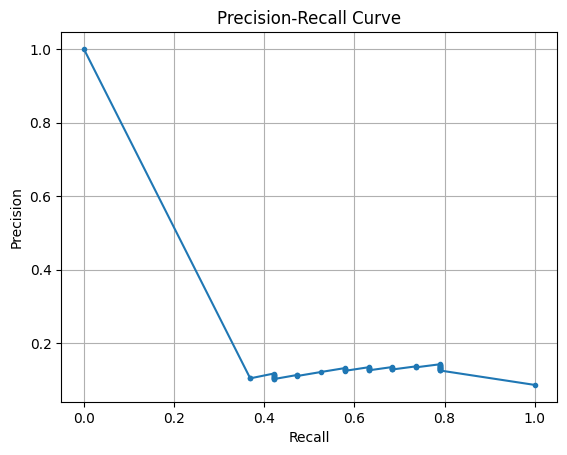

In [669]:
# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# VERSION 2

In [672]:
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.5537974683544303, 1: 5.147058823529412}

In [673]:
# Build
model = keras.Sequential([
    keras.layers.Input(shape=(25,)),                # Number of input features
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')     # Single output unit for binary classification
])


# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(), 'accuracy', 'Precision', 'Recall'])


# Fit and train
history = model.fit(X_train, y_train, epochs=100, batch_size=30, verbose=0, validation_split=0.2, class_weight=class_weight_dict)

In [674]:
# Predict
y_probs = model.predict(X_train)
y_train_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_train_pred))

# Metrics
metrics = calculate_metrics(y_true=y_train, y_pred=y_train_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
{0: 647, 1: 228}
{'precision': 0.1404, 'recall': 0.3765, 'f1': 0.2045, 'accuracy': 0.7154, 'auc': 0.5955}


In [675]:
# Predict
y_probs = model.predict(X_test)
y_test_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_test_pred))

# Metrics
metrics = calculate_metrics(y_true=y_test, y_pred=y_test_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
{0: 175, 1: 44}
{'precision': 0.1364, 'recall': 0.3158, 'f1': 0.1905, 'accuracy': 0.7671, 'auc': 0.6105}


# Version 3

In [679]:
# Build
model = keras.Sequential([
    keras.layers.Input(shape=(25,)),                # Number of input features
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')     # Single output unit for binary classification
])


# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(), 'accuracy', 'Precision', 'Recall'])


# Fit and train
history = model.fit(X_train, y_train, epochs=100, batch_size=30, verbose=0, validation_split=0.2, class_weight=class_weight_dict)

In [680]:
# Predict
y_probs = model.predict(X_train)
y_train_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_train_pred))

# Metrics
metrics = calculate_metrics(y_true=y_train, y_pred=y_train_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
{0: 84, 1: 791}
{'precision': 0.0986, 'recall': 0.9176, 'f1': 0.1781, 'accuracy': 0.1771, 'auc': 0.5064}


In [681]:
# Predict
y_probs = model.predict(X_test)
y_test_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_test_pred))

# Metrics
metrics = calculate_metrics(y_true=y_test, y_pred=y_test_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
{0: 23, 1: 196}
{'precision': 0.0867, 'recall': 0.8947, 'f1': 0.1581, 'accuracy': 0.1735, 'auc': 0.4983}


# Version 4

In [685]:
# Build
model = keras.Sequential([
    keras.layers.Input(shape=(25,)),                # Number of input features
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')     # Single output unit for binary classification
])


# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(), 'accuracy', 'Precision', 'Recall'])


# Fit and train
history = model.fit(X_train, y_train, epochs=100, batch_size=30, verbose=0, validation_split=0.2, class_weight=class_weight_dict)

In [686]:
# Predict
y_probs = model.predict(X_train)
y_train_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_train_pred))

# Metrics
metrics = calculate_metrics(y_true=y_train, y_pred=y_train_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
{0: 357, 1: 518}
{'precision': 0.1158, 'recall': 0.7059, 'f1': 0.199, 'accuracy': 0.448, 'auc': 0.5738}


In [687]:
# Predict
y_probs = model.predict(X_test)
y_test_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_test_pred))

# Metrics
metrics = calculate_metrics(y_true=y_test, y_pred=y_test_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
{0: 93, 1: 126}
{'precision': 0.119, 'recall': 0.7895, 'f1': 0.2069, 'accuracy': 0.4749, 'auc': 0.6534}


# Version 5

In [711]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=7)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [712]:
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train_smote), 
    y=y_train_smote
)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 1.0, 1: 1.0}

In [715]:
# Build
model = keras.Sequential([
    keras.layers.Input(shape=(25,)),                # Number of input features
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')     # Single output unit for binary classification
])


# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(), 'accuracy', 'Precision', 'Recall'])


# Fit and train
history = model.fit(X_train_smote, y_train_smote, epochs=100, batch_size=30, verbose=0, validation_split=0.2, class_weight=class_weight_dict)

In [716]:
# Predict
y_probs = model.predict(X_train_smote)
y_train_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_train_pred))

# Metrics
metrics = calculate_metrics(y_true=y_train_smote, y_pred=y_train_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
{0: 949, 1: 635}
{'precision': 0.9213, 'recall': 0.7386, 'f1': 0.8199, 'accuracy': 0.8378, 'auc': 0.9462}


In [717]:
# Predict
y_probs = model.predict(X_test)
y_test_pred = (y_probs > 0.5).astype(int) # Apply threshold
print(unique_value_counts(y_test_pred))

# Metrics
metrics = calculate_metrics(y_true=y_test, y_pred=y_test_pred, y_prob=y_probs,  metrics=['precision', 'recall', 'f1', 'accuracy', 'auc'])
print(metrics)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
{0: 188, 1: 31}
{'precision': 0.3548, 'recall': 0.5238, 'f1': 0.4231, 'accuracy': 0.863, 'auc': 0.695}


In [ ]:
# # Evaluate the model
# metrics = model.evaluate(X_train, y_train)

# precision = metrics[2]
# recall = metrics[3]
# f1_score = 2 * (precision * recall) / (precision + recall)
# auc_pr = roc_auc_score(y_train, y_train_pred)

# # Print results
# print(f"Accuracy: {metrics[1]:.4f}")
# print(f"Precision: {metrics[2]:.4f}")
# print(f"Recall: {metrics[3]:.4f}")
# print(f"F1 Score: {f1_score:.4f}")
# print(f'AUC-PR: {auc_pr:.4f}')

# # Accuracy: 0.5000
# # Precision: 0.9029
# # Recall: 0.0000
# # F1 Score: 0.0000
# # AUC-PR: 0.5000

# # Compute precision and recall values
# precision, recall, thresholds = precision_recall_curve(y_train, probabilities)

# # Plot the Precision-Recall curve
# plt.figure()
# plt.plot(recall, precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.grid(True)
# plt.show()